In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]

In [2]:
df = pd.read_csv("data/train.csv", index_col="date")
df.index = pd.to_datetime(df.index, utc=True)

In [3]:
# Fonction pour appliquer toutes les transformations faites dans ce notebook
def geo_tweak(df):
    ville_seuil = [
        ("Montpellier", 130),
        ("Lille", 300),
        ("Grenoble", 245),
        ("Nice", 180),
        ("Rennes", 110),
        ("Rouen", 110),
        ("Marseille", 600),
        ("Lyon", 500),
        ("Paris", 500),
        ("Nantes", 90),
        ("Toulouse", 230),
    ]
    return (
        df.rename(
            columns={
                "Auvergne-Rhône-Alpes": "ARA",
                "Bourgogne-Franche-Comté": "BFC",
                "Centre-Val de Loire": "CVL",
                "Grand Est": "GE",
                "Hauts-de-France": "HDF",
                "Nouvelle-Aquitaine": "NA",
                "Pays de la Loire": "PL",
                "Provence-Alpes-Côte d'Azur": "PACA",
                "Île-de-France": "IDF",
                "Montpellier Méditerranée Métropole": "Montpellier",
                "Métropole Européenne de Lille": "Lille",
                "Métropole Grenoble-Alpes-Métropole": "Grenoble",
                "Métropole Nice Côte d'Azur": "Nice",
                "Métropole Rennes Métropole": "Rennes",
                "Métropole Rouen Normandie": "Rouen",
                "Métropole d'Aix-Marseille-Provence": "Marseille",
                "Métropole de Lyon": "Lyon",
                "Métropole du Grand Nancy": "Nancy",
                "Métropole du Grand Paris": "Paris",
                "Nantes Métropole": "Nantes",
                "Toulouse Métropole": "Toulouse",
            },
        )
        .assign(Nancy=lambda x: x["Nancy"].where(x.index >= "2020-01-01", float("nan")))
        .assign(Nice=lambda x: x["Nice"].where(x.index <= "2021-08-01", float("nan")))
        .pipe(
            lambda x: x.assign(
                **{
                    ville: x[ville].where(x[ville] >= seuil, float("nan"))
                    for ville, seuil in ville_seuil
                }
            )
        )
    )

In [4]:
# Simplification des noms de colonnes
df.rename(
    columns={
        "Auvergne-Rhône-Alpes": "ARA",
        "Bourgogne-Franche-Comté": "BFC",
        "Centre-Val de Loire": "CVL",
        "Grand Est": "GE",
        "Hauts-de-France": "HDF",
        "Nouvelle-Aquitaine": "NA",
        "Pays de la Loire": "PL",
        "Provence-Alpes-Côte d'Azur": "PACA",
        "Île-de-France": "IDF",
        "Montpellier Méditerranée Métropole": "Montpellier",
        "Métropole Européenne de Lille": "Lille",
        "Métropole Grenoble-Alpes-Métropole": "Grenoble",
        "Métropole Nice Côte d'Azur": "Nice",
        "Métropole Rennes Métropole": "Rennes",
        "Métropole Rouen Normandie": "Rouen",
        "Métropole d'Aix-Marseille-Provence": "Marseille",
        "Métropole de Lyon": "Lyon",
        "Métropole du Grand Nancy": "Nancy",
        "Métropole du Grand Paris": "Paris",
        "Nantes Métropole": "Nantes",
        "Toulouse Métropole": "Toulouse",
    },
    inplace=True,
)
regions = list(df.columns)[1:13]
villes = list(df.columns)[13:]
villes_no_paris = villes.copy()
villes_no_paris.remove("Paris")
regions_france = ["France"] + regions
cols = list(df.columns)

<Axes: >

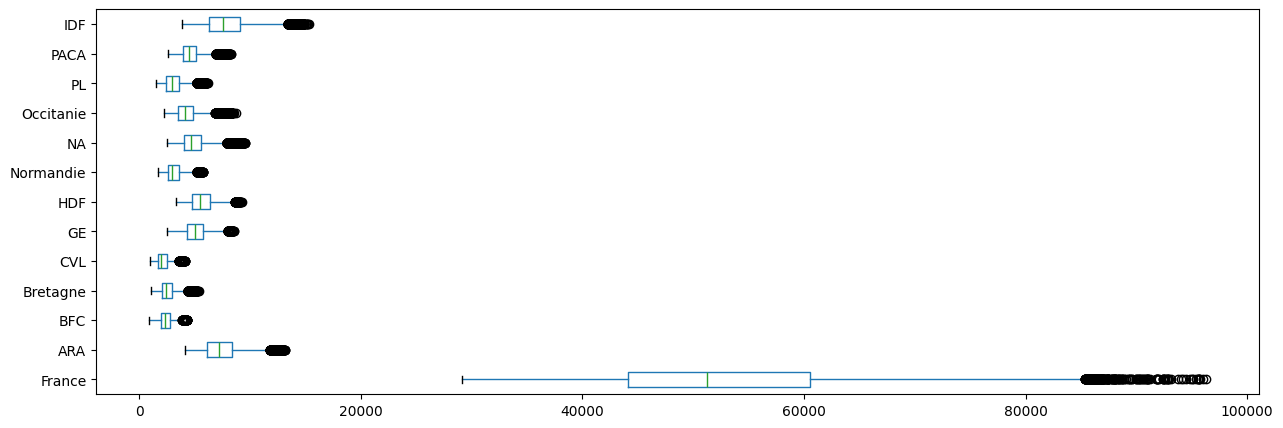

In [5]:
# Recherche valeurs abérante
df[regions_france].boxplot(
    vert=False,
    fontsize=10,
    grid=False,
)

In [15]:
# Valeurs abérantes pour les villes, qu'on supprime plus tard
df[villes].boxplot(
    vert=False,
    fontsize=10,
    grid=False
)

<Axes: >

In [ ]:
df[villes].hist(
    bins=50,
);

In [ ]:
df[regions].hist(
    bins=50,
    );

In [ ]:
# Corrélation étrange pour Nancy, Nice
df.corr().style.background_gradient(cmap='coolwarm')

,France,ARA,BFC,Bretagne,CVL,GE,HDF,Normandie,NA,Occitanie,PL,PACA,IDF,Montpellier,Lille,Grenoble,Nice,Rennes,Rouen,Marseille,Lyon,Nancy,Paris,Nantes,Toulouse
France,1.000000,0.982927,0.971098,0.965693,0.971790,0.967231,0.971667,0.970690,0.975844,0.953249,0.975475,0.914687,0.976005,0.882170,0.942487,0.841531,0.753309,0.936002,0.935615,0.889358,0.955082,0.556249,0.956042,0.944687,0.937975
ARA,0.982927,1.000000,0.973596,0.926470,0.946605,0.961360,0.949016,0.938366,0.954076,0.937958,0.950099,0.902216,0.946102,0.861348,0.914875,0.862951,0.734998,0.912509,0.912848,0.879629,0.955457,0.521726,0.929967,0.922685,0.924482
BFC,0.971098,0.973596,1.000000,0.924694,0.936407,0.973627,0.954038,0.935450,0.932314,0.895132,0.946016,0.848276,0.946093,0.820016,0.934589,0.828493,0.686900,0.931104,0.916540,0.853510,0.942812,0.549962,0.931223,0.923579,0.895491
Bretagne,0.965693,0.926470,0.924694,1.000000,0.953406,0.923529,0.943868,0.970353,0.943119,0.905119,0.978825,0.858517,0.932288,0.838625,0.915773,0.762701,0.730164,0.931583,0.915509,0.831805,0.893422,0.561127,0.905385,0.932321,0.893227
CVL,0.971790,0.946605,0.936407,0.953406,1.000000,0.928637,0.948941,0.961851,0.952826,0.921320,0.959605,0.872221,0.937135,0.849208,0.906557,0.808814,0.724939,0.898341,0.916200,0.837421,0.900459,0.525738,0.912258,0.912876,0.897720
GE,0.967231,0.961360,0.973627,0.923529,0.928637,1.000000,0.965569,0.935313,0.919247,0.875652,0.944158,0.830567,0.949045,0.806383,0.946439,0.821568,0.675901,0.938146,0.921885,0.846490,0.932945,0.548695,0.932116,0.926661,0.883088
HDF,0.971667,0.949016,0.954038,0.943868,0.948941,0.965569,1.000000,0.963917,0.922797,0.881259,0.949317,0.834767,0.957192,0.794076,0.953982,0.834091,0.687332,0.931607,0.934759,0.830372,0.905943,0.508875,0.936529,0.930577,0.880670
Normandie,0.970690,0.938366,0.935450,0.970353,0.961851,0.935313,0.963917,1.000000,0.933495,0.894975,0.963369,0.847251,0.950610,0.820231,0.923651,0.791416,0.708466,0.914267,0.939205,0.824968,0.889227,0.521740,0.917157,0.924916,0.889518
NA,0.975844,0.954076,0.932314,0.943119,0.952826,0.919247,0.922797,0.933495,1.000000,0.966034,0.957361,0.917144,0.932433,0.883092,0.893762,0.806634,0.739817,0.896764,0.898940,0.873310,0.930664,0.552216,0.909711,0.912014,0.935602
Occitanie,0.953249,0.937958,0.895132,0.905119,0.921320,0.875652,0.881259,0.894975,0.966034,1.000000,0.911481,0.960937,0.904340,0.930571,0.851073,0.809261,0.797837,0.846406,0.864762,0.890195,0.926493,0.517614,0.887337,0.869116,0.953307


In [ ]:
# On enlève les values de Nancy éronnées
df['Nancy'].plot()
plt.axvline(pd.Timestamp("2020-01-01"), color='r', linestyle='--')
df = df.assign(Nancy=lambda x: x['Nancy'].where(x.index >= "2020-01-01", float('nan')))
df['Nancy'].plot();

In [ ]:
df['Nice'].plot()
plt.axvline(pd.Timestamp("2021-08-01"), color='r', linestyle='--')
df = df.assign(Nice=lambda x: x['Nice'].where(x.index <= "2021-08-01", float('nan')))
df['Nice'].plot()

<Axes: title={'center': 'IDF'}, xlabel='date'>

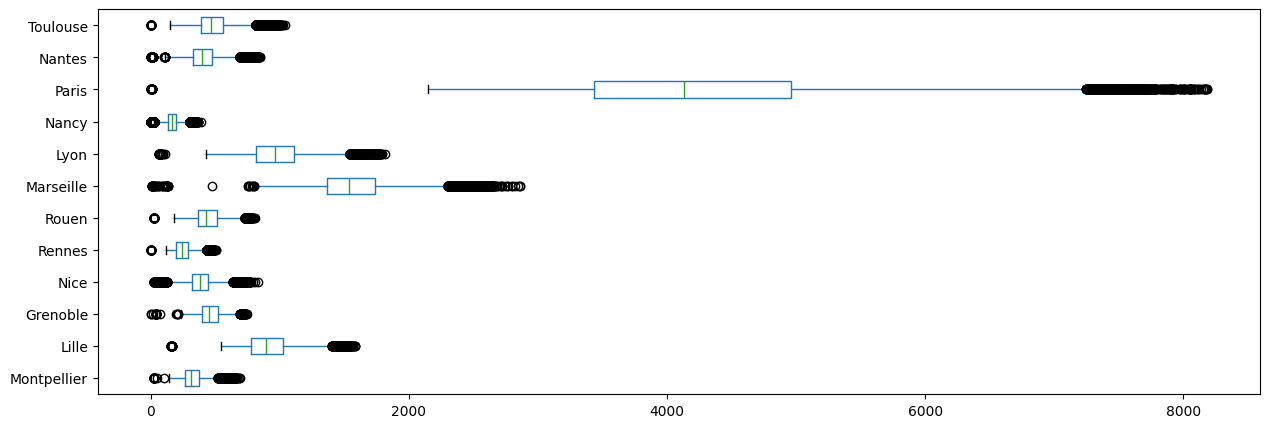

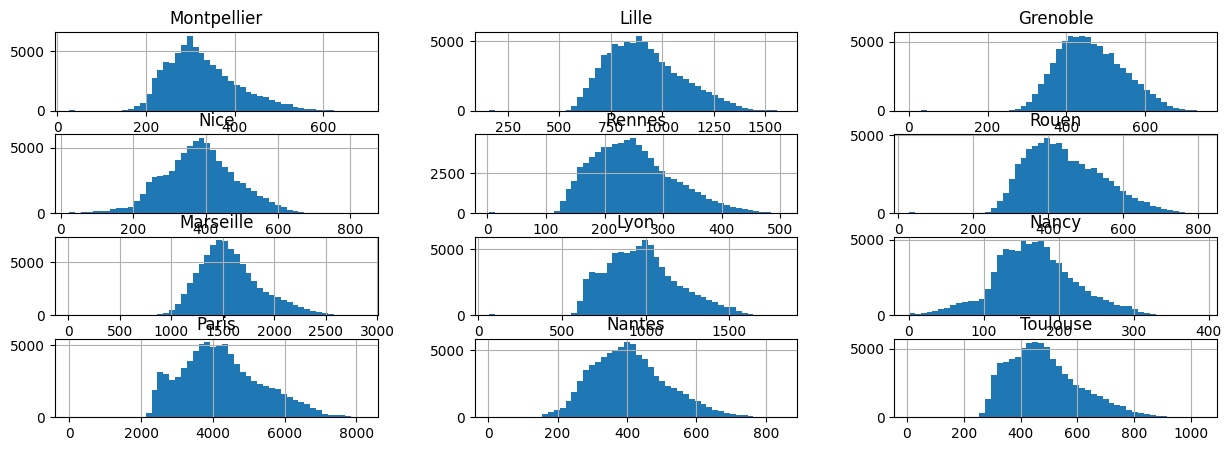

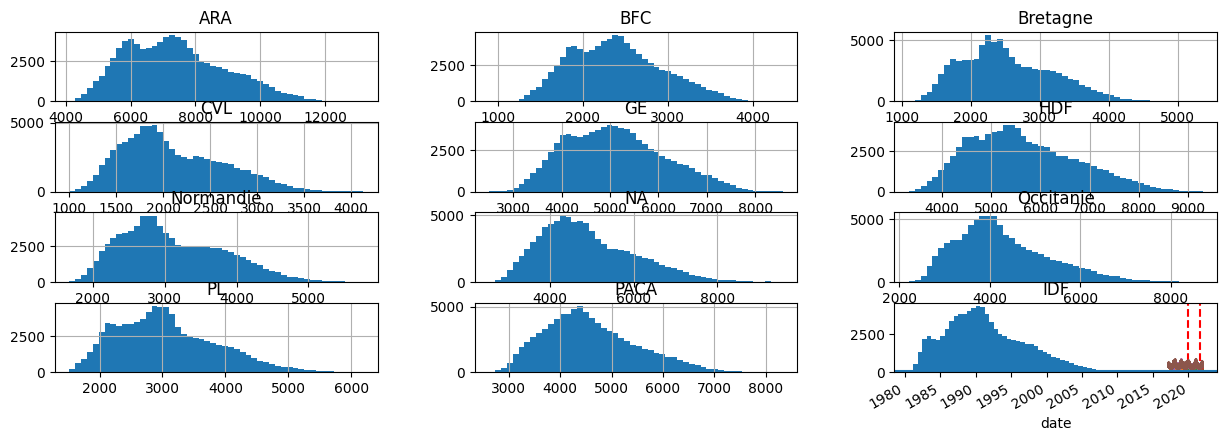

<Axes: xlabel='date'>

In [ ]:
# Beaucoups de valeurs aberrantes pour les villes, on les cherche une par une puis les élimine
ville_seuil = [
    ('Montpellier', 130),
    ('Lille', 300),
    ('Grenoble', 245),
    ('Nice', 180),
    ('Rennes', 110),
    ('Rouen', 110),
    ('Marseille', 600),
    ('Lyon', 500),
    ('Paris', 500),
    ('Nantes', 90),
    ('Toulouse', 230),
]
laville = 'Nantes'
df[laville].plot()
df = df.pipe(lambda x: x.assign(**{ville: x[ville].where(x[ville] >= seuil, float('nan')) for ville, seuil in ville_seuil}))
plt.axhline(90)
plt.show()
df[laville].plot()

In [ ]:
# Le boxplot ne montre plus de valeurs abérantes
df[villes].boxplot(
    vert=False,
    fontsize=10,
    grid=False
)

<Axes: xlabel='date'>

In [ ]:
# Corrélation semble bonne maintenant
df.corr().style.background_gradient(cmap='coolwarm')

,France,ARA,BFC,Bretagne,CVL,GE,HDF,Normandie,NA,Occitanie,PL,PACA,IDF,Montpellier,Lille,Grenoble,Nice,Rennes,Rouen,Marseille,Lyon,Nancy,Paris,Nantes,Toulouse
France,1.000000,0.982927,0.971098,0.965693,0.971790,0.967231,0.971667,0.970690,0.975844,0.953249,0.975475,0.914687,0.976005,0.883785,0.944963,0.845948,0.868983,0.937564,0.938111,0.893287,0.958125,0.958682,0.957765,0.946248,0.939856
ARA,0.982927,1.000000,0.973596,0.926470,0.946605,0.961360,0.949016,0.938366,0.954076,0.937958,0.950099,0.902216,0.946102,0.862971,0.917311,0.867727,0.853296,0.914069,0.915346,0.883636,0.958607,0.948028,0.931667,0.924243,0.926411
BFC,0.971098,0.973596,1.000000,0.924694,0.936407,0.973627,0.954038,0.935450,0.932314,0.895132,0.946016,0.848276,0.946093,0.821188,0.936909,0.832686,0.802696,0.932556,0.918797,0.856994,0.945700,0.955607,0.932744,0.924958,0.897078
Bretagne,0.965693,0.926470,0.924694,1.000000,0.953406,0.923529,0.943868,0.970353,0.943119,0.905119,0.978825,0.858517,0.932288,0.839678,0.917762,0.765834,0.811910,0.932839,0.917484,0.834800,0.895762,0.899651,0.906617,0.933576,0.894578
CVL,0.971790,0.946605,0.936407,0.953406,1.000000,0.928637,0.948941,0.961851,0.952826,0.921320,0.959605,0.872221,0.937135,0.850681,0.908856,0.812886,0.814149,0.899753,0.918586,0.840948,0.903161,0.914429,0.913805,0.914323,0.899412
GE,0.967231,0.961360,0.973627,0.923529,0.928637,1.000000,0.965569,0.935313,0.919247,0.875652,0.944158,0.830567,0.949045,0.807547,0.948894,0.825772,0.797030,0.939686,0.924256,0.850007,0.935840,0.957874,0.933696,0.928107,0.884683
HDF,0.971667,0.949016,0.954038,0.943868,0.948941,0.965569,1.000000,0.963917,0.922797,0.881259,0.949317,0.834767,0.957192,0.795393,0.956693,0.838663,0.793633,0.933296,0.937437,0.834034,0.908856,0.942058,0.938297,0.932209,0.882431
Normandie,0.970690,0.938366,0.935450,0.970353,0.961851,0.935313,0.963917,1.000000,0.933495,0.894975,0.963369,0.847251,0.950610,0.821521,0.926005,0.795285,0.799304,0.915717,0.941705,0.828335,0.891830,0.915043,0.918686,0.926378,0.891137
NA,0.975844,0.954076,0.932314,0.943119,0.952826,0.919247,0.922797,0.933495,1.000000,0.966034,0.957361,0.917144,0.932433,0.884716,0.895957,0.810664,0.857290,0.898144,0.901206,0.877087,0.933534,0.915374,0.911233,0.913438,0.937452
Occitanie,0.953249,0.937958,0.895132,0.905119,0.921320,0.875652,0.881259,0.894975,0.966034,1.000000,0.911481,0.960937,0.904340,0.932441,0.853027,0.813310,0.909398,0.847566,0.866817,0.894121,0.929301,0.880078,0.888774,0.870374,0.955244


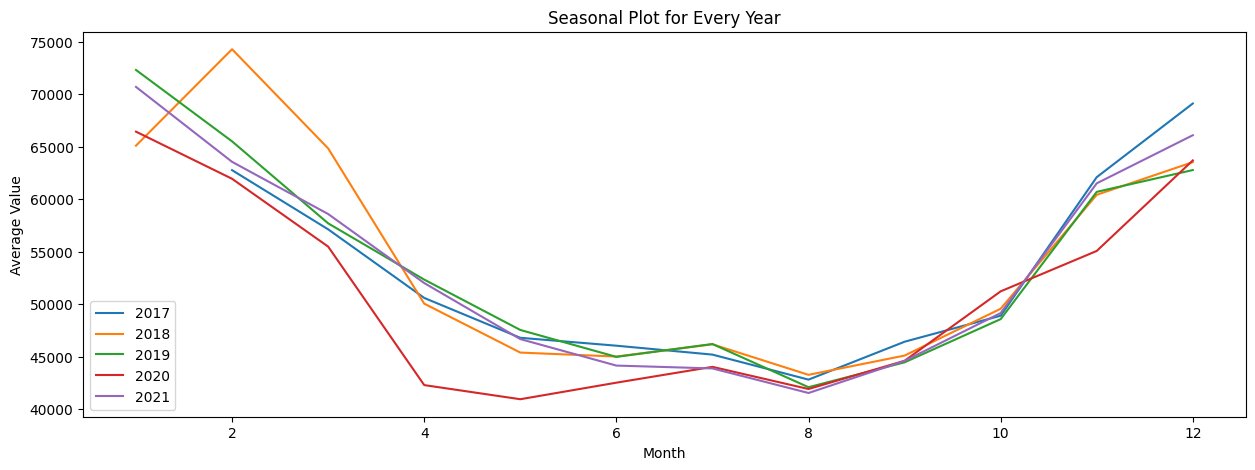

In [ ]:
year_min = df.index.min().year
year_max = df.index.max().year
for year in range(year_min, year_max + 1):
    df_year = df.loc[f'{year}']
    df_year.groupby(df_year.index.month).mean()['France'].plot(label=f'{year}')
plt.legend()
plt.title('Seasonal Plot for Every Year')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()

In [ ]:
df.index.time
df.index.dayofweek

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='date', length=85571)

In [16]:
import missingno as msno
msno.matrix(df)

<Axes: >

In [17]:
villes_no_nancy = villes.copy()
villes_no_nancy.remove('Nancy')

df[(df.index.year > 2017) & (df[villes_no_nancy].isna())].index

ValueError: Unable to coerce to Series, length must be 11: given 85571

In [ ]:
# Coupure jusque 2017-10-23 07:00:00+00:00 ? Pour toutes les villes
pd.DataFrame(df[(df.index.year) & (df['Montpellier'].isna())].index)

# Check for non-consecutive NaN values for a specific city
city = 'Montpellier'
nan_dates = df[df[city].isna()].index
non_consecutive_nan_dates = nan_dates[nan_dates.to_series().diff() != pd.Timedelta('30 minutes')]
non_consecutive_nan_dates = non_consecutive_nan_dates[1:] # On enlève le premier jour du dataset
print(non_consecutive_nan_dates)

for date in non_consecutive_nan_dates:
    trente_min = pd.DateOffset(minutes=30) 
    # print(type(date))
    # print(type(trente_min))
    # print(type(date - trente_min))
    before = df.loc[date - trente_min, city]
    after = df[city].loc[date + pd.DateOffset(minutes=30)]
    df.at[date, city] = (before + after) / 2

DatetimeIndex(['2017-09-30 22:00:00+00:00', '2017-10-01 03:00:00+00:00',
               '2017-10-03 16:00:00+00:00', '2017-10-12 19:30:00+00:00',
               '2017-10-22 05:00:00+00:00', '2017-11-02 14:00:00+00:00',
               '2017-11-07 10:30:00+00:00', '2018-02-26 20:30:00+00:00',
               '2018-03-25 01:00:00+00:00', '2018-04-15 08:30:00+00:00',
               ...
               '2021-09-07 10:00:00+00:00', '2021-09-07 21:30:00+00:00',
               '2021-09-08 21:30:00+00:00', '2021-09-11 21:30:00+00:00',
               '2021-09-12 21:30:00+00:00', '2021-09-16 20:30:00+00:00',
               '2021-09-22 16:30:00+00:00', '2021-10-20 22:00:00+00:00',
               '2021-10-26 22:00:00+00:00', '2021-11-08 22:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=158, freq=None)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.offsets.DateOffset'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs

KeyError: Timestamp('2018-10-28 00:30:00+0000', tz='UTC')